In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Market_Risk_Data_coded.csv')

In [3]:
df.head()

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,28-03-2016,217,316,386,114,173
1,04-04-2016,218,302,386,121,171
2,11-04-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           418 non-null    object
 1   ITC Limited    418 non-null    int64 
 2   Bharti Airtel  418 non-null    int64 
 3   Tata Motors    418 non-null    int64 
 4   DLF Limited    418 non-null    int64 
 5   Yes Bank       418 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.7+ KB


In [5]:
df.shape

(418, 6)

In [6]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           418 non-null    datetime64[ns]
 1   ITC Limited    418 non-null    int64         
 2   Bharti Airtel  418 non-null    int64         
 3   Tata Motors    418 non-null    int64         
 4   DLF Limited    418 non-null    int64         
 5   Yes Bank       418 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 19.7 KB


In [8]:
df.select_dtypes(exclude=['datetime']).describe().T


,count,mean,std,min,25%,50%,75%,max
ITC Limited,418.0,278.964115,75.114405,156.0,224.25,265.5,304.00,493.0
Bharti Airtel,418.0,528.260766,226.507879,261.0,334.00,478.0,706.75,1236.0
Tata Motors,418.0,368.617225,182.024419,65.0,186.00,399.5,466.00,1035.0
DLF Limited,418.0,276.827751,156.280781,110.0,166.25,213.0,360.50,928.0
Yes Bank,418.0,124.442584,130.090884,11.0,16.00,30.0,249.75,397.0


In [9]:
columns = [col for col in df.columns if col != 'Date']

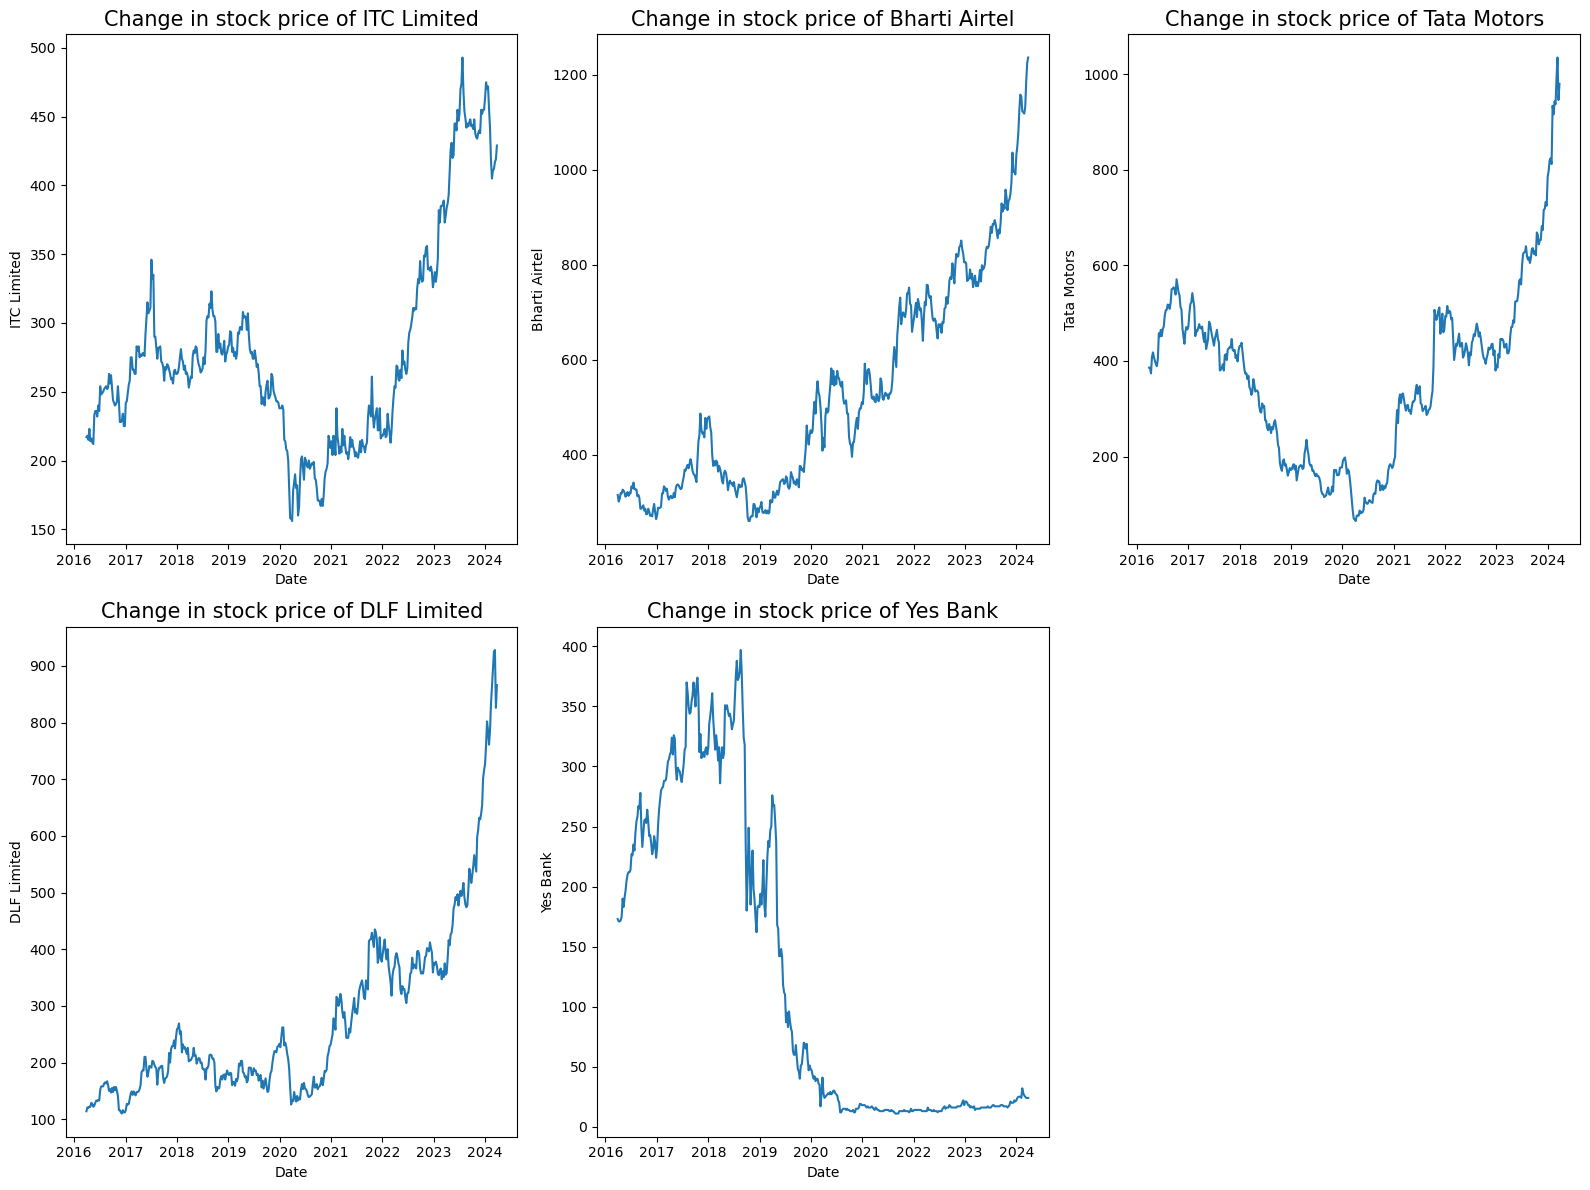

In [10]:
plt.figure(figsize = (16,12))
for i in range(len(columns)):
    if df[columns[i]].dtype != 'datetime64[ns]':
        plt.subplot(2, 3, i + 1)
        sns.lineplot(y=df[columns[i]], x="Date", data=df)
        plt.title('Change in stock price of {}'.format(columns[i]), fontsize=15)
        plt.tight_layout()

In [11]:
stock_returns = np.log(df.drop(['Date'],axis=1)).diff(axis = 0, periods = 1) 

In [12]:
stock_returns.head()

,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,NaN,NaN,NaN,NaN,NaN
1,0.004598,-0.045315,0.000000,0.059592,-0.011628
2,-0.013857,0.019673,-0.031582,-0.008299,0.000000
3,0.036534,0.038221,0.087011,0.016529,0.005831
4,-0.041196,-0.003130,0.024214,0.000000,0.017291


In [13]:
stock_means = stock_returns.mean(axis = 0)
stock_means

ITC Limited      0.001634
Bharti Airtel    0.003271
Tata Motors      0.002234
DLF Limited      0.004863
Yes Bank        -0.004737
dtype: float64

In [15]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

ITC Limited      0.035904
Bharti Airtel    0.038728
Tata Motors      0.060484
DLF Limited      0.057785
Yes Bank         0.093879
dtype: float64

In [ ]:
df1['Average'].mean()

In [17]:
df1= pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df1

,Average,Volatility
ITC Limited,0.001634,0.035904
Bharti Airtel,0.003271,0.038728
Tata Motors,0.002234,0.060484
DLF Limited,0.004863,0.057785
Yes Bank,-0.004737,0.093879


In [20]:
df1['Average'].mean()

0.0014530536633267017

In [21]:
df1['Volatility'].mean()

0.05735593368670251

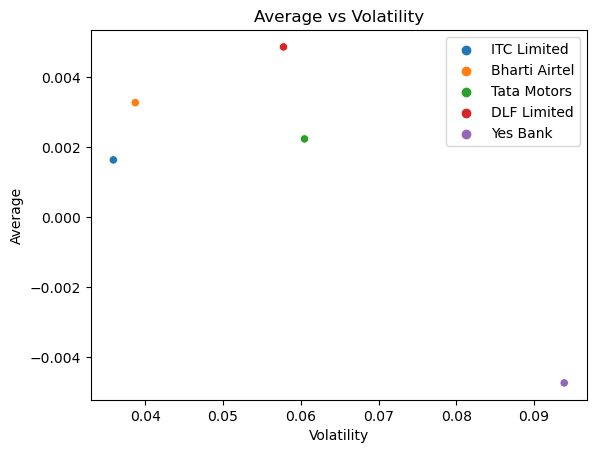

In [22]:
plot = sns.scatterplot(x='Volatility',y='Average',data=df1,hue=df1.index)
plt.title("Average vs Volatility");

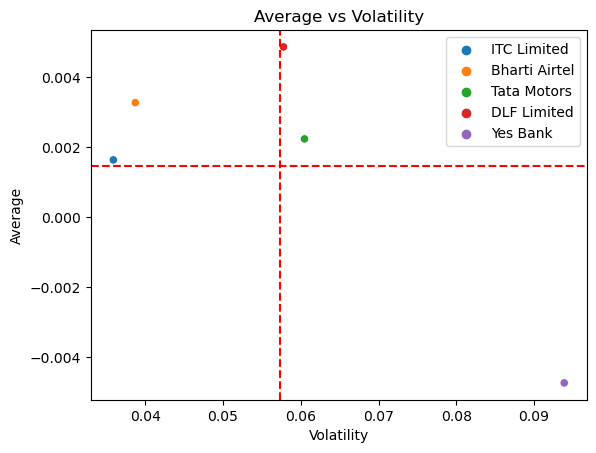

In [18]:
plot = sns.scatterplot(x='Volatility',y='Average',data=df1,hue=df1.index)
plot.axvline(x=0.057355,linestyle='--', color = "red")
plot.axhline(y=0.001453,linestyle='--', color = "red")
plt.title("Average vs Volatility");